In [20]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [9]:
engine = create_engine("sqlite:///mta.db")

In [10]:
all_tables = engine.table_names()
all_tables

['station_sample']

In [22]:
overallChart = pd.read_sql('select sample_num,sum(DAILY_ENTRIES) as system_total from station_sample group by sample_num;', engine)
overallChart.shape

(15, 2)

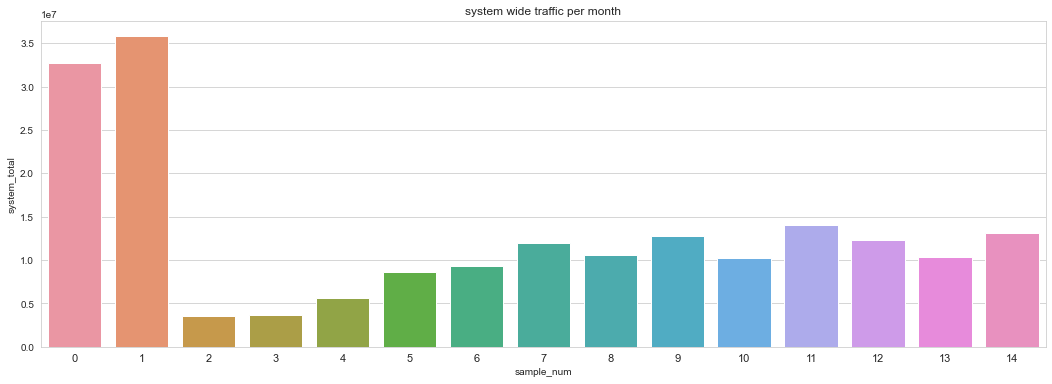

In [27]:
plt.figure(figsize=(18,6))
sns.barplot(x='sample_num', y='system_total', data=overallChart)
plt.title('system wide traffic per month')
plt.xticks(fontsize=11);

In [31]:
busiest_precovid = pd.read_sql('select STATION,DAILY_ENTRIES from station_sample where sample_num=0 order by DAILY_ENTRIES DESC limit 5 ;', engine)
busiest_precovid

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,858001.0
1,GRD CNTRL-42 ST,760683.0
2,23 ST,653328.0
3,34 ST-HERALD SQ,642209.0
4,42 ST-PORT AUTH,538602.0


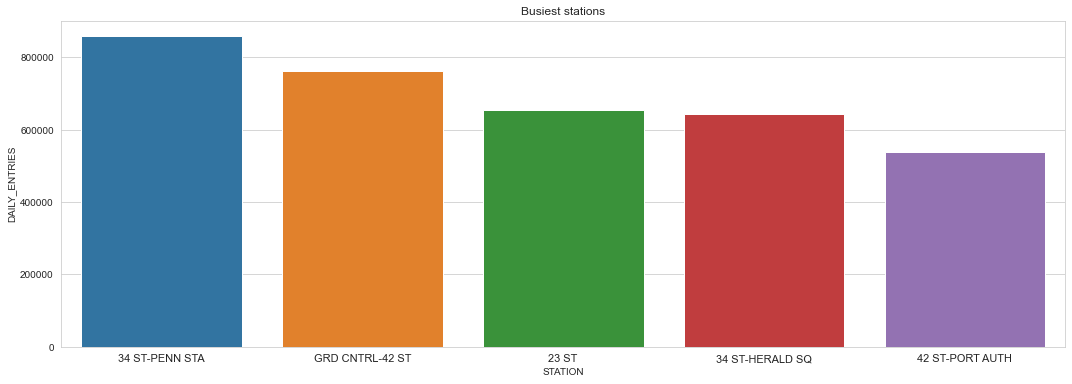

In [32]:
plt.figure(figsize=(18,6))
sns.barplot(x='STATION', y='DAILY_ENTRIES', data=busiest_precovid)
plt.title('Busiest stations')
plt.xticks(fontsize=11);

In [35]:
top5_over_time = pd.read_sql('WITH  top_5 AS(select STATION from station_sample where sample_num=0 order by DAILY_ENTRIES DESC limit 5 ) select sample_num,sum(DAILY_ENTRIES) as top5_total from station_sample where STATION in top_5 group by sample_num;', engine)
top5_over_time.head(2)

,sample_num,top5_total
0,0,3452823.0
1,1,4554227.0


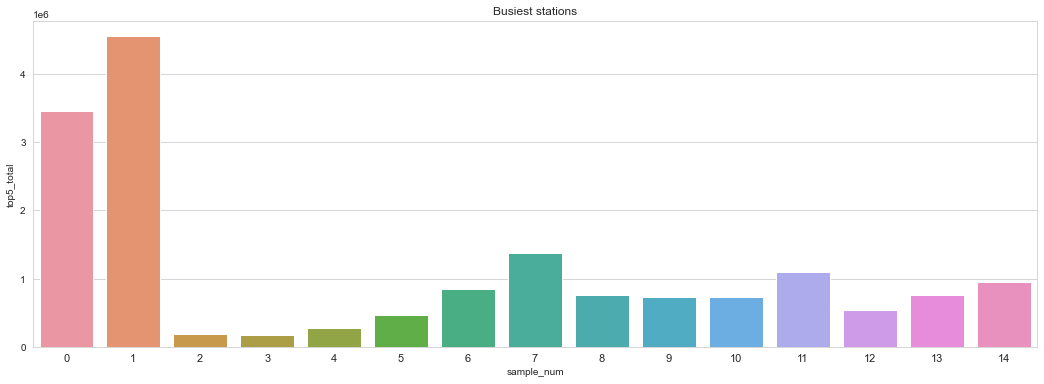

In [36]:
plt.figure(figsize=(18,6))
sns.barplot(x='sample_num', y='top5_total', data=top5_over_time)
plt.title('Busiest stations')
plt.xticks(fontsize=11);